<a href="https://colab.research.google.com/github/beomso0/publicservant_AI/blob/master/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5 - Data Crawling from Website

이번 과제에서 학생들은 웹사이트에서 데이터를 수집하고 원하는 형태로 정리하는 연습을 하게될 것이다.

* 제출 방법: GitHub (11/25 자정까지)
* 파일 이름: A5-학번-이름(영어로).zip 형식으로 (예: A5-13403-999-jiyoon.zip)

## 1. 미디어다음에서 제공하는 영어사전 웹사이트에서 랜돔으로 100개의 단어를 수집하고, 단어와 단어의 의미를 보기 좋게 출력하시오.

예: http://dic.daum.net/word/view.do?wordid=ekw000078303&q=help


* 저장 형식은 자유. 단, 가능한 한 보기 좋게 내용을 편집하여 저장하자.

  예)
  
    단어 1 
      1. 뜻풀이  
      2. 뜻풀이 
    ===  
    단어 2 
      1. 뜻풀이

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
import random

"""url을 살펴보면, http://dic.daum.net/word/view.do?wordid=ekw 뒤에 9자리 숫자가 붙어서 url을 구성하고 있다. 범위를 좁히며 살펴보면, 
대략적으로 000000001부터 000388000 사이의 숫자에 단어가 존재함을 알 수 있다. cf) 간혹 범위 내이더라도 단어가 없는 경우도 존재하므로 단순히 
해당 범위 내의 숫자를 랜덤으로 선택하면 오류가 발생한다."""

#여유있게 200개 url 생성.
url_list1 = []
cho = random.sample(range(1,388001), 200)
for i in cho:
    zero = (9 - len(str(i))) *"0"
    url_can = ("http://dic.daum.net/word/view.do?wordid=ekw"+zero+str(i))
    url_list1.append(url_can)
    
#200개 url 중 페이지가 존재하는 url 100개 생성.
url_list2 = []
for i in url_list1:
    with urllib.request.urlopen(i) as url:
        doc = url.read()
        soup = BeautifulSoup(doc, "html.parser")
        words = soup.find("span", class_ = "txt_cleanword") 
        if words is not None:
            url_list2.append(i)
    if len(url_list2) == 100:
         break

In [ ]:
#http://dic.daum.net/word/view.do?wordid=ekw000200000을 예시로 html 구조 파악

with urllib.request.urlopen("http://dic.daum.net/word/view.do?wordid=ekw000200000") as url:
    doc = url.read()
    soup = BeautifulSoup(doc, "html.parser")
    words = soup.find("span", class_ = "txt_cleanword")
    print(words)
    # --> span, class="txt_cleanword"에 있는 단어가 표제어 임을 알 수 있음
    
    #표제어 하단에 있는 주요 뜻 찾기
    paras = soup.find("div",class_ = "detail_top")
    #print(paras) --> "span", class_ = "txt_mean"의 text들이 단어 뜻임을 알 수 있음.
    means = paras.find_all("span", class_ = "txt_mean")
    print(means)

<span class="txt_cleanword">deflowerer
</span>
[<span class="txt_mean"><daum:word id="kew000070494">처녀성</daum:word><daum:word id="kew000057049">을</daum:word> <daum:word id="kew000035798">빼앗는</daum:word> <daum:word id="kew000060028">자</daum:word></span>, <span class="txt_mean"><daum:word id="kew000012480">꽃</daum:word><daum:word id="kew000006954">과</daum:word> <daum:word id="kew000002141">같은</daum:word> <daum:word id="kew000003447">것</daum:word><daum:word id="kew000057049">을</daum:word> <daum:word id="kkw000170892">앗아</daum:word><daum:word id="kew000000131">가는</daum:word> <daum:word id="kew000057612">이</daum:word></span>]
[<span class="num_mean">1.</span>, <span class="num_mean">2.</span>]


In [ ]:
# url_list를 바탕으로 표제어 json 형태로 write

import json
from collections import OrderedDict

words_list = []
a = 1
for dic_url in url_list2:
    word = OrderedDict()
    with urllib.request.urlopen(dic_url) as url:
        doc = url.read()
        soup = BeautifulSoup(doc, "html.parser")
        words = soup.find("span", class_ = "txt_cleanword")
        paras = soup.find("div",class_ = "detail_top")
        means = paras.find_all("span", class_ = "txt_mean")
        
        #표제어 입력
        word["단어 "+str(a)] = words.text.strip()
        
        #뜻 입력
        for i in range(1,len(means)+1):
            word[str(i)] =  means[i-1].text.strip()
    words_list.append(word)
    a+=1
    
with open('dict.json', 'w', encoding="utf-8") as make_file:
    json.dump(words_list, make_file, ensure_ascii=False, indent = "\t")

## 2. 트위터에서 키워드를 중심으로 데이터를 수집하고 텍스트를 분석하자.

* 텍스트 분석은 frequency, co-occurrence 등 지난 시간에 다루었던 것들을 이용해 보자.(wordcloud, 의미망 분석 등)
* 이번 과제는 
    * 트위터 수집 코드
    * 수집된 데이터
    * 수집된 데이터를 분석하는 코드
    
    등으로 이루어질 것이다. 모든 결과물을 zip으로 압축해서 제출한다.
* 이번 과제는 굳이 jupyter notebook의 형태로 제출하지 않아도 된다. 아마 jupyter notebook을 사용한다면 <수집된 데이터를 분석하는 코드> 정도가 있을 것이다.

In [ ]:
# 트위터 수집 코드

""" 수집된 데이터는 압축파일에 있는 'isu_station.json' 이다. 
2018년 11월 15일 5시 경
track keyword : '이수역, 이수'로 수집한 데이터이다."""


import tweepy
import json

consumer_key = 'lbQ6DE0xZp9y9b6k8t6F2QsGR'
consumer_secret = '0J3hYgrn9jTFdxWqUXpjOCufDdtaXoxbEhb7etaW0DyAwSwIZq'
access_token = '1061866271489150977-8f5TpM9ev34cYI6Kr0Cn1iOnHlIuRa'
access_secret = '2Q7sboqJaPritOm5GJdudVv9ufTVIwgvmj9XRATwWib1w'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

class MyListener(tweepy.StreamListener):

    def on_status(self, data):
        print(data.text + "\n----")

    def on_data(self, data):
        try:
            with open('tweet_stream.json', 'a', newline = '\n') as file:
                file.write(data)
                print(data)
                return True
        except BaseException as e:
            print("Error on_data: {}".format(str(e)))
        return True

twitter_stream = tweepy.Stream(auth, MyListener())
twitter_stream.filter(track=['이수역, 이수'], encoding = 'utf-8')

KeyboardInterrupt: ignored

In [ ]:
import json

#stream으로 수집한 json 파일 열기
isu_data = []
with open("isu_station.json") as file:
    data = file.readlines()
    for d in data:
        isu_data.append(json.loads(d))

In [ ]:
# text list 생성
#retweet된 경우와 그렇지 않은 경우를 구분하고, retweet된 트윗은 텍스트가 생략되기도하므로, 생략된 경우는 full_text를 추출하여 분석에 사용했다.

isu_text = []
for tweet in isu_data:
    if ("text" in tweet) and ("user" in tweet):
        if 'retweeted_status' in tweet.keys():
            if 'extended_tweet' in tweet['retweeted_status'].keys():
                isu_text.append(tweet['retweeted_status']['extended_tweet']['full_text'])           
            else :                 
                isu_text.append(tweet['retweeted_status']['text'])          
        else :              
            isu_text.append(tweet['text'])
        #len(isu_text) :17025

In [ ]:
# text 중 명사와 형용사를 추출하여 wordcloud를 그린다.
# Twitter Class 는 Okt로 이름이 바뀌었다.
from konlpy.tag import Kkma
from konlpy.tag import Okt
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [ ]:
# 5000개 text 추출하여 명사 tagging 후 most_common으로 정렬.
tagger = Okt()
tagged_texts = [tagger.pos(text, norm = True, stem=True) for text in isu_text[0:5000]]
tagged_texts
selec_list = []
for text in tagged_texts:
    for word,tag in text:        
        if tag == 'Noun':
            selec_list.append(word)
selec_counts = Counter(selec_list)
selec_counts = selec_counts.most_common()

In [ ]:
# 대명사, 명사가 아님에도 명사로 분류된 것, 유의미성을 갖지 않는 것들 제외(제외의 기준이 모호한 것은 한계)
remove_noun = ['젠', '이나','이','것','명','안','거','그','뿐','비','메','일이','패','님','님들','중','계','곳임','그거','그냥','무슨',\
'내','이번','누가','자리','수','둘','팼다','대해','일어나서','건','등등','라며','그때','아닛','아유','고','저','후','주심','먼저','위','일',\
'등','안녕하십니까','젤','네','진','일도','것일','함','남사','당한','척','난','뭐','정말','모','사성','데','더','또','분','못','로','어쩌면'\
,'다시','우선','좀','모든','존나','통해','상대로','보아','퍼뜨리','계속','널리','강','자','달라','심지어','갑자기','라면','하라']

#tuple의 list를 cloud.fit_words()에 바로 넣으면 오류 발생 --> 딕셔너리 형태로 변환
selec_dict={}
for key, value in selec_counts:
    if key not in remove_noun:
        selec_dict[key] = value

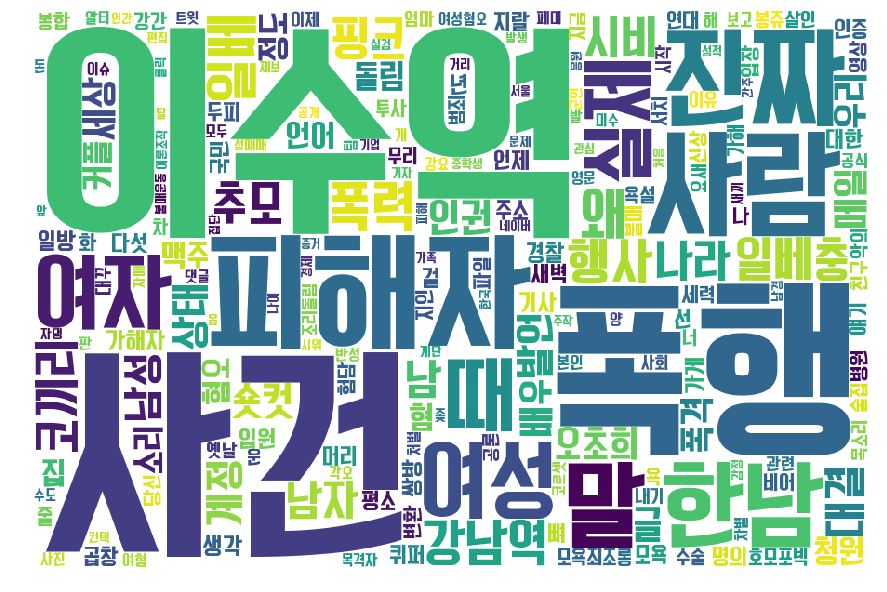

In [ ]:
cloud = WordCloud(width=900, height=600, 
                  font_path='‪C:\Windows\Fonts\oldbath.ttf',
                  background_color='white')
cloud = cloud.fit_words(selec_dict)
plt.figure(figsize=(15, 20)) 
plt.axis('off') 
plt.imshow(cloud)
plt.show()